# Regresión lineal simple

La regresión lineal es un algoritmo de regresión perteneciente a la familia de algoritmos de Machine Learning. <br>
Nos ayuda a **predecir** datos futuros o previos con un set de datos utilizando una linea recta que trate de pasar por la mayoria de los datos. 

Este algoritmo es un termino estadístico que se conoce como un modelo matemático, que nos ayuda a encontrar la relación entre un valor desconocido (variable _dependiente_) a partir de un valor relacionado conocido (variable _independiente_) que tenga el modelo.

**Ecuación**
$$
y = \beta x + \alpha
$$

**Composición**
- $y$: Variable dependiente
- $x$: Varible independiente
- $\beta$: Pendiente
- $\alpha$: Ordenada al origen (valor teorico de la variable $y$ cuando $x$ vale $0$)

Si prestamos atención la ecuación de la regresión lineal es igual a la función lineal que dibuja una recta $y = mx + b$, lo que cambia es la representación de la pendiente y la ordenada al origen. <br>

La linea recta que se debe trazar a lo largo de los datos, tiene dos incognitas la pendiente $\beta$ y la ordenada al origen $\alpha$, por lo tanto necesitamos encontrar aquellos valores que mejor se ajusten a los datos, pues podemos encontrar más de una linea recta que se aproxime a los datos con los que estamos trabajando, sin embargo no todas esas rectas son las mejores. La forma de encontrar la recta ideal es midiendo que tan "equivocados" estamos, para ello se utiliza el _método de mínimos cuadrados_, que nos dira si la recta que estamos usando es la mejor.

> **NOTA** Se llama regresión lineal _simple_ porque solo podemos inclui una sola variable independiente.

## Método de mínimos cuadrados

Los mínimos cuadrados es un procedimiento de análisis numérico en el que, dado un conjunto de datos, se intenta determinar la función continua que mejor se aproxime a los datos (línea de regresión o la línea de mejor ajuste), proporcionando una demostración visual de la relación entre los puntos. <br>
Busca minimizar la suma de cuadrados de las diferencias ordenadas (residuos) entre los puntos generados por la función línea y los datos datos. <br>

**Ecuación**
$$
\hat y = {\beta}_0 + {\beta}_{1}x
$$

**Composición**
- $\hat y$: Valor predicho por la línea de ajuste.
- ${\beta}_0$: Termino de intersección de la línea de ajuste
- ${\beta}_1$: Pendiente de la línea de ajuste.
- $x$: Valor de la variable independiente

La idea es encontrar los valores óptimos de ${\beta}_0$ y ${\beta}_1$ que minimicen la suma de los errores al cuadrado. <br>
Para lograrlo tenemos la siguiente ecuación que nos ayuda a determinar el valor para ${\beta}_1$ (pendiente de la línea de ajuste).
$$
   {\beta}_1 =  \frac { \sum_ (x - \text{\={x}}) (y - \text{\={y}}) }{ \sum_ (x - \text{\={x}})^2}
$$

Para encontrar el valor de la intersección de la línea de ajuste lo logramos al despejar ${\beta}_0$ de la ecuación original y posteriormente sustituyendo los valores para ${\beta}_1$, $\hat y$ y $x$. <br>
Quedadon de la siguiente manera
$$
    {\beta}_0 = \hat y - {\beta}_{1}x
$$

Donde los valores correspondientes para $x$ y $y$ serían sus medias ($\text{\={x}}$ y $\text{\={y}}$). Se toman los valroes de las medias debido a que ambos forman un punto por el cual SI o SI la recta de regresión lineal debe cruzar. <br>

## Error cuadratico medio (ECM)

El error cuadratico medio, es una medida del rendimiento de un modelo de regresión lineal. <br>
Es una metrica que cuantifica la diferencia promedio entre los valores reales y los valores predichos por el modelo. El objetivo es minimizar este error para obtener un ajuste más preciso.

**Ecuación**
$$
ECM = {\frac 1 n} {\sum (y_{i} - \hat y)^2}
$$

**Composición**
- $EMC$: Error cuadrativo medio.
- $n$: Número de puntos de datos.
- $y_{i}$: Valor real del punto de datos en $i$.
- $\hat y$: Valor predicho por el modelo en el punto de datos $i$.

El objetivo es minimizar el valor de $ECM$.

## Ejercicio practico de regresión lineal

Suponiendo que contamos con la siguiente tabla, en la cual se  relacionan los gastado en publicidad con sus respectivas ganacias generadas (expresadas en miles de DLLs).
| Gasto en punlicidad | Ganancias |
| --- | --- |
| 1.2 | 2 |
| 2 | 3 |
| 3.2 | 3.4 |
| 2.5 | 3.1 |
| 5 | 4 |
| 6 | 4.7 |
| 4 | 3.8 |
| 8 | 7 |

Debemos aplicar tecnicas de regresión líneal para encontrar la recta que mejor se ajuste a los datos y calcular el errir cuadratico medio. <br>
Para resolverlo se aplica cada punto explicado en la parte superior de este documento.

Importamos las librerias que vamos a necesitar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Empezamos aplicando el método de mínimos cuadrados**

Implementamos el algoritomo para determinar los valores de ${\beta}_0$ y ${\beta}_1$

In [29]:
def get_b0_b1(x, y):
    # obtenemos las medias de x y y
    m_x, m_y = np.mean(x), np.mean(y)
    
    # aplicamos la formula para b1
    b1 = np.sum((x - m_x) * (y - m_y)) / np.sum((x - m_x) ** 2)

    # aplicamos la formula para b0
    b0 = m_y - b1 * m_x
    return (b0, b1)

Una vez calculados los valores de ${\beta}_0$ (intersección) y ${\beta}_1$(pendiete) procedemos a generar valores para $\hat y$

In [60]:
def generete_y_hat(x, y):
    y_hat = np.size(x)
    b0, b1 = get_b0_b1(x, y)

    # Aplicamos la ecuación para obtener los valores de y en la línea de ajuste
    y_hat = b0 + (b1 * x)

    return y_hat

Creamos una función para crear la grafica de los datos y la línea recta de la regresión líneal.

In [53]:
def generate_plot(x, y):
    fig, ax = plt.subplots()
    # Scatter de los datos
    ax.scatter(x, y, label='Puntos de entrada')
    # Obtenemos los valores para la línea de ajuste
    y_hat = generete_y_hat(x, y)
    # Línea de regresión
    ax.plot(x, y_hat, 'g', label='Línea de ajuste')

    # Dibujamos en el plano el punto correspondientes a los valores de las medias de x y y
    m_x, m_y = np.mean(x), np.mean(y)
    ax.plot(m_x, m_y, 'ro', label='Media')

    ax.set_title(f'Gastos vs Ganancias')
    ax.set_xlabel('Gasto en publicidad')
    ax.set_ylabel('Ganancias')
    ax.legend()
    plt.grid()
    plt.show()


Calculamos el _Error Cuadratico Medio_

In [54]:
def ECM(x, y):
    n = len(y)
    y_hat = generete_y_hat(x, y)
    ecm = (1/n) * np.sum((y - y_hat) ** 2)
    return ecm

Creamos los `arrays` con los datos de la tabla:

gastado: (8,)
ganancias: (8,)


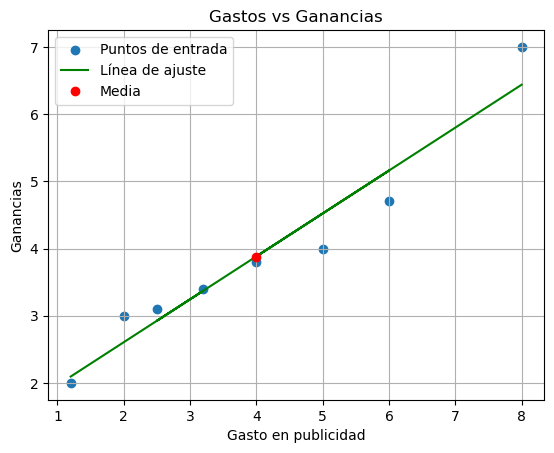

El error cuadratico medio de la regresión es de 0.125378634153168


In [55]:
# Casteamos todos los valores al mismo tipo de dato, en este caso float64 para tener más presición.
gastado = np.array([1.2, 2, 3.2, 2.5, 5, 6, 4, 8], dtype='float64')
ganancias = np.array([2, 3, 3.4, 3.1, 4, 4.7, 3.8, 7], dtype='float64')

print(f'gastado: {gastado.shape}')
print(f'ganancias: {ganancias.shape}')

generate_plot(gastado, ganancias)

ecm = ECM(gastado, ganancias)
print(f'El error cuadratico medio de la regresión es de {ecm}')